In [8]:
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import sys
from scipy import signal
import game_of_life as gol
from matplotlib import animation
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

# Setting up video encoder paths
ff_path = os.path.join('C:/', 'ImageMagick-7.0.9-Q16', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)

In [20]:
importlib.reload(gol)

<module 'game_of_life' from 'C:\\Users\\arttu.lehtinen\\Desktop\\general_DataScience\\gameOfLife\\game_of_life.py'>

In [ ]:
#1. Solu muuttuu eläväksi, jos sen naapureista tasan kolme on eläviä.
#2. Solu pysyy elävänä, jos sen naapureista tasan 2 tai 3 on eläviä. Muuten solu kuolee.

In [46]:
Size=10
world_array=np.random.choice([0, 1], size=(Size,Size))
world_array=np.zeros([Size,Size])
# Glider
world_array[2:5,4]=1
world_array[4,3]=1
world_array[3,2]=1
print(world_array)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [47]:
game=gol.GameOfLife(world_array)
steps=game.run(duration=50)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
0


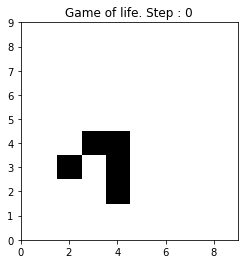

In [54]:
# First set up the figure, the axis, and the plot element we want to animate
def gol_animation(steps):
    Size=steps[0].shape[0]
    fig = plt.figure()
    ax = plt.axes(xlim=(0, Size-1), ylim=(0, Size-1))
    #line, = ax.plot([], [], lw=2)

    # initialization function: plot the background of each frame
    def init():
        ax.set_data([], [])
        return ax

    # animation function.  This is called sequentially
    def animate(i):
        frame=steps[i]
        print(i)
        size=frame.shape[0]
        #G is a NxNx3 matrix
        G = np.zeros((size,size,3))
        #Where we set the RGB for each pixel
        G[frame>0.5] = [0,0,0]
        G[frame<0.5] = [1,1,1]
        ax.imshow(G,interpolation='nearest')
        ax.set_title("Game of life. Step : "+str(i))
        return ax

    a=0.5
    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=None,
                                   frames=len(steps)-1, interval=500, blit=False)
    return anim

anim= gol_animation(steps)

FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
#C:\Users\arttu.lehtinen\Desktop
anim.save(os.path.join('C:/','Users\\arttu.lehtinen\\Desktop\\projektit','basic_animation.mp4'), writer = FFwriter)
#

plt.show()

In [51]:
HTML(anim.to_html5_video())

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
